<a href="https://colab.research.google.com/github/Saikat-Mandal/Custom-models-ML/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we will create **Logistic Regression** model from scratch using python.

Logistic regression formula :

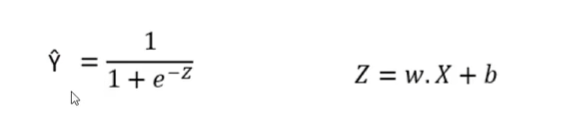

y_cap is Dependent variable
x is Independent variable
w is weight
b is bias

Gradient descent:

Gradient descent is an optimization algorithm used for minimizing the cost function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw
b = b - α*db

Here α is the learning rate which is the tuning parameter for the algoritrm that determines step size for the each iteration while moving towards the global minimum of the cost function.

we need an optimal learning rate to reach the global minimum as if learning rate is to low , it will slow down the process or if learning rate is too high it might overshoot the global minimum.

we define dw as -

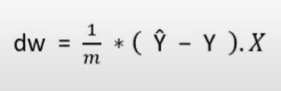

and db as -

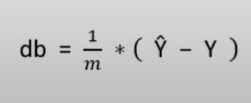

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
class LogisticRegression:

    def __init__(self, learning_rate, n_iter):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        # number of samples (m) and features (n)
        self.m, self.n = X.shape

        # initialize weights and bias
        self.w = np.zeros(self.n)
        self.b = 0

        for i in range(self.n_iter):
            self.update_weights(X, y)

    def update_weights(self, X, y):
        # sigmoid function: prediction
        z = np.dot(X, self.w) + self.b
        y_pred = 1 / (1 + np.exp(-z))

        # compute gradients
        dw = (1 / self.m) * np.dot(X.T, (y_pred - y))
        db = (1 / self.m) * np.sum(y_pred - y)

        # update weights
        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        y_pred = 1 / (1 + np.exp(-z))
        return np.where(y_pred > 0.5, 1, 0)


In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = df.drop('Outcome' ,axis=1)
y = df['Outcome']

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [15]:
model = LogisticRegression(learning_rate=0.01 , n_iter=1000)

In [16]:
model.fit(X_train , y_train)

In [17]:
y_preds = model.predict(X)

In [18]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

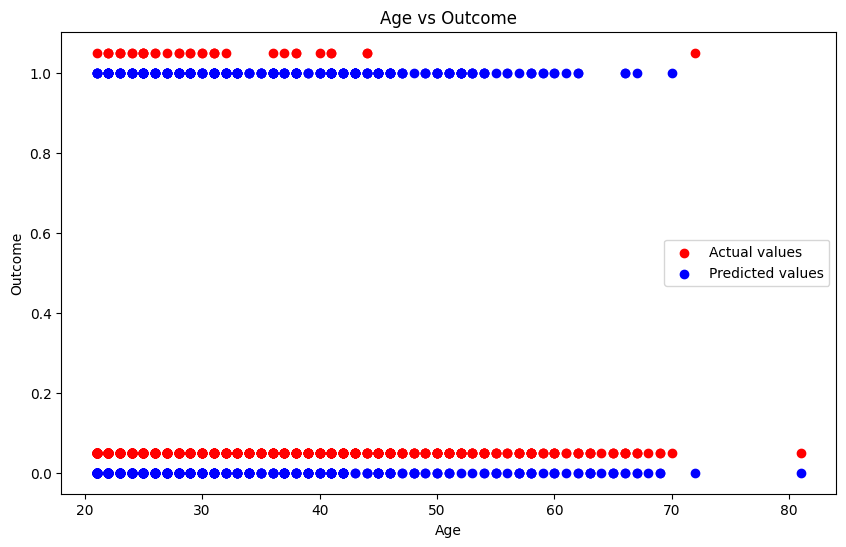

In [22]:
fig , ax = plt.subplots(figsize=(10,6))
# Jitter red dots for visibility
ax.scatter(df['Age'], y_preds + 0.05, color="red", label="Predicted")
ax.scatter(df['Age'], df['Outcome'], color="blue", label="Actual")


ax.set_xlabel('Age')
ax.set_ylabel('Outcome')
ax.set_title('Age vs Outcome')
ax.legend(["Actual values" , "Predicted values"]);